In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_util import *

In [2]:
song = pd.read_json("res/song_meta.json")[["id", "song_name", "artist_id_basket", "artist_name_basket",\
                                            "album_id", "album_name", "song_gn_gnr_basket",\
                                            "song_gn_dtl_gnr_basket", "issue_date"]]
genre = pd.read_json("res/genre_gn_all.json", typ="series")
train = pd.read_json("res/train.json")[["id", "plylst_title", "songs", "tags", "like_cnt", "updt_date"]]
val = pd.read_json("res/val.json")[["id", "plylst_title", "songs", "tags", "like_cnt", "updt_date"]]
test = pd.read_json("res/test.json")[["id", "plylst_title", "songs", "tags", "like_cnt", "updt_date"]]
display(song, genre, train, val, test)

,id,song_name,artist_id_basket,artist_name_basket,album_id,album_name,song_gn_gnr_basket,song_gn_dtl_gnr_basket,issue_date
0,0,Feelings,[2727],[Various Artists],2255639,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,[GN0900],[GN0901],20140512
1,1,"Bach : Partita No. 4 In D Major, BWV 828 - II....",[29966],[Murray Perahia],376431,"Bach : Partitas Nos. 2, 3 & 4",[GN1600],"[GN1601, GN1606]",20080421
2,2,Solsbury Hill (Remastered 2002),[3361],[Peter Gabriel],4698747,Hit,[GN0900],[GN0901],20180518
3,3,Feeling Right (Everything Is Nice) (Feat. Popc...,[838543],[Matoma],2644882,Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],"[GN1102, GN1101]",20151016
4,4,그남자 그여자,[560160],[Jude Law],2008470,그남자 그여자,[GN1800],"[GN1802, GN1801]",20110824
...,...,...,...,...,...,...,...,...,...
707984,707984,Coffin For Head Of State,[166499],[Fela Kuti],65254,The Best Best Of The Black President,[GN2000],[GN2001],19991219
707985,707985,Change Of Heart,[11837],[Cyndi Lauper],44141,True Colors,[GN0900],[GN0901],19860000
707986,707986,스치듯 안녕,[437],[윤종신],2662866,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,[GN0100],"[GN0105, GN0101]",20160120
707987,707987,숲의 빛,[729868],[Nature Piano],2221722,명상의 시간을 위한 뉴에이지 음악,[GN1800],"[GN1807, GN1801]",20131217


GN0100       발라드
GN0101    세부장르전체
GN0102       '80
GN0103       '90
GN0104       '00
           ...  
GN2900       뮤지컬
GN2901    세부장르전체
GN2902     국내뮤지컬
GN2903     국외뮤지컬
GN3000     크리스마스
Length: 254, dtype: object

,id,plylst_title,songs,tags,like_cnt,updt_date
0,61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",[락],71,2013-12-19 18:36:19.000
1,10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...","[추억, 회상]",1,2014-12-02 16:19:42.000
2,76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...","[까페, 잔잔한]",17,2017-08-28 07:09:34.000
3,147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...","[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",33,2019-12-05 15:15:18.000
4,27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",[댄스],9,2011-10-25 13:54:56.000
...,...,...,...,...,...,...
115066,120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...","[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",3,2020-04-17 04:31:11.000
115067,106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",[일렉],13,2015-12-24 17:23:19.000
115068,11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...","[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",4,2019-08-16 20:59:22.000
115069,131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...","[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",4,2019-10-25 23:40:42.000


,id,plylst_title,songs,tags,like_cnt,updt_date
0,118598,,"[373313, 151080, 275346, 696876, 165237, 52593...",[],1675,2019-05-27 14:14:33.000
1,131447,앨리스테이블,[],[],1,2014-07-16 15:24:24.000
2,51464,,"[529437, 516103, 360067, 705713, 226062, 37089...",[],62,2008-06-21 23:26:22.000
3,45144,,"[589668, 21711, 570151, 320043, 13930, 599327,...",[],20,2017-10-30 18:15:43.000
4,79929,,"[672718, 121924, 102694, 683657, 201558, 38511...",[],20,2017-02-07 11:40:42.000
...,...,...,...,...,...,...
23010,101722,,"[75842, 26083, 244183, 684715, 500593, 508608,...",[잔잔한],17,2015-12-17 14:06:05.000
23011,122127,,"[450275, 487671, 561031, 663944, 628672, 59121...","[어머니, 힘들때, 아빠, 가족, 위로받고싶을때]",10,2020-04-16 21:35:44.000
23012,77438,,"[625875, 464051, 11657, 236393, 358186, 213435...",[],0,2019-03-27 15:27:40.000
23013,36231,,"[161094, 665833, 688145, 432735, 439938, 12665...",[],31,2015-11-18 11:49:09.000


,id,plylst_title,songs,tags,like_cnt,updt_date
0,70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",[],6,2012-09-29 01:57:26.000
1,7461,,"[196298, 269984, 267805, 175867, 529244, 63825...","[나만의Best3, 인디아티스트들의추천음악]",0,2019-12-17 14:06:45.000
2,90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",[드라이브],21,2015-05-23 10:44:48.000
3,58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",[분위기],0,2019-03-14 09:47:34.000
4,102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",[],38,2018-07-11 16:43:32.000
...,...,...,...,...,...,...
10735,137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",[추억],16,2016-04-18 11:02:09.000
10736,936,,"[105140, 582252, 199262, 422915, 547967, 48791...","[띵곡의, 우울, 분위기, 드라이브, 산책]",1,2020-04-08 07:15:59.000
10737,110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",[기분전환],6,2016-06-29 00:57:21.000
10738,2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",[여름],4,2015-06-06 09:52:01.000


0 : skip <br>
1 ~ 50 : <br>
51 ~ 99 : <br>
100 : <br>

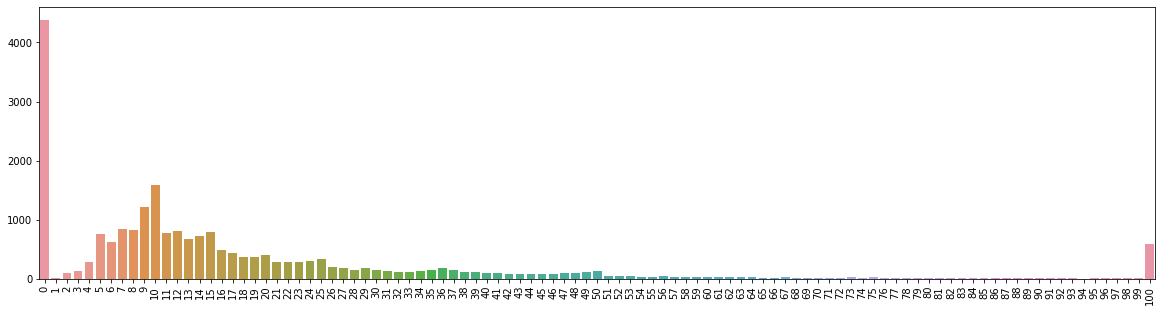

In [17]:
cnt = [0 for _ in range(101)]
for i in val.index:
    length = len(val.songs[i])
    cnt[length] += 1
plt.figure(figsize=(20,5))
sns.barplot(x=[i for i in range(101)], y=cnt)
plt.xticks(rotation=90)
plt.savefig('graph/val_songs_cnt.png')

In [18]:
(cnt[0] / sum(cnt[1:])) * 100

23.497531659154326

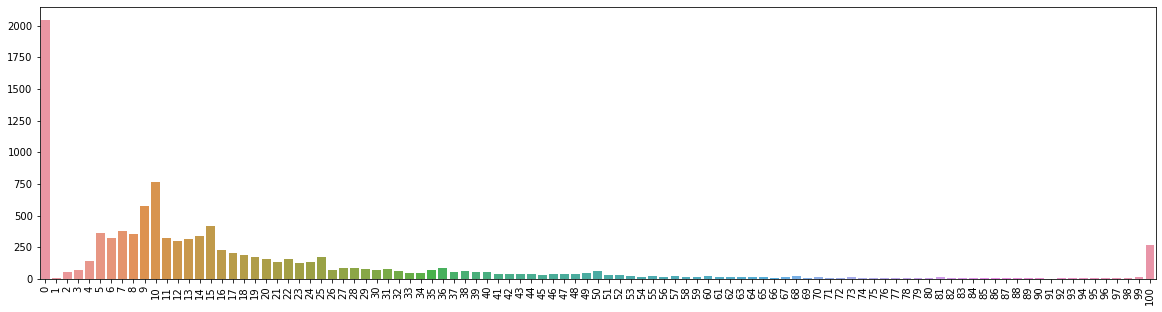

In [12]:
cnt = [0 for _ in range(101)]
for i in test.index:
    length = len(test.songs[i])
    cnt[length] += 1
plt.figure(figsize=(20,5))
sns.barplot(x=[i for i in range(101)], y=cnt)
plt.xticks(rotation=90)
plt.savefig('graph/test_songs_cnt.png')

In [16]:
(cnt[0] / sum(cnt[1:])) * 100

0.23490858916867885

count : songs!=[] and tags==[]

In [6]:
cnt = 0
cnt2 = 0
for i in val.index:
    if val.songs[i] != [] and val.tags[i] == []:
        cnt += 1
    elif val.songs[i] == [] and val.tags[i] == []:
        cnt2 += 1
cnt, cnt2, (cnt/cnt2)*100

(9661, 1749, 552.3727844482561)

In [5]:
cnt = 0
cnt2 = 0
for i in test.index:
    if test.songs[i] != [] and test.tags[i] == []:
        cnt += 1
    elif test.songs[i] == [] and test.tags[i] == []:
        cnt2 += 1
cnt, cnt2, (cnt/cnt2)*100

(4507, 811, 555.7336621454994)